## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import eda_helper_functions
from sklearn.ensemble import IsolationForest

C:\Aditya\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Read the Training Data

In [2]:
file_path = r"C:\Users\lenovo\Flight price\data\train.csv"
train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-06-21,Mumbai,Hyderabad,10:20:00,11:50:00,90,0.0,No Info,8040
1,Multiple Carriers,2019-06-06,Delhi,Cochin,11:25:00,19:00:00,455,1.0,No Info,10877
2,Jet Airways,2019-06-06,Banglore,Delhi,11:10:00,14:05:00,175,0.0,No Info,8016
3,Jet Airways,2019-03-21,Banglore,New Delhi,09:45:00,15:55:00,370,1.0,In-flight meal not included,7280
4,Jet Airways,2019-06-12,Kolkata,Banglore,06:30:00,12:00:00,330,1.0,In-flight meal not included,9899
...,...,...,...,...,...,...,...,...,...,...
635,Multiple Carriers,2019-05-21,Delhi,Cochin,11:25:00,19:00:00,455,1.0,No Info,9103
636,Air India,2019-06-09,Kolkata,Banglore,12:00:00,13:15:00,1515,1.0,No Info,7662
637,Jet Airways,2019-03-12,Banglore,New Delhi,05:45:00,23:00:00,1035,1.0,No Info,13817
638,Air India,2019-06-12,Kolkata,Banglore,10:00:00,13:45:00,1665,2.0,No Info,12224


In [3]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [4]:
train = train.assign(**{
    col:pd.to_datetime(train.loc[:,col],dayfirst=True)
    for col in ['date_of_journey','dep_time','arrival_time']
})

In [5]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-06-21,Mumbai,Hyderabad,2024-06-14 10:20:00,2024-06-14 11:50:00,90,0.0,No Info,8040
1,Multiple Carriers,2019-06-06,Delhi,Cochin,2024-06-14 11:25:00,2024-06-14 19:00:00,455,1.0,No Info,10877
2,Jet Airways,2019-06-06,Banglore,Delhi,2024-06-14 11:10:00,2024-06-14 14:05:00,175,0.0,No Info,8016
3,Jet Airways,2019-03-21,Banglore,New Delhi,2024-06-14 09:45:00,2024-06-14 15:55:00,370,1.0,In-flight meal not included,7280
4,Jet Airways,2019-06-12,Kolkata,Banglore,2024-06-14 06:30:00,2024-06-14 12:00:00,330,1.0,In-flight meal not included,9899
...,...,...,...,...,...,...,...,...,...,...
635,Multiple Carriers,2019-05-21,Delhi,Cochin,2024-06-14 11:25:00,2024-06-14 19:00:00,455,1.0,No Info,9103
636,Air India,2019-06-09,Kolkata,Banglore,2024-06-14 12:00:00,2024-06-14 13:15:00,1515,1.0,No Info,7662
637,Jet Airways,2019-03-12,Banglore,New Delhi,2024-06-14 05:45:00,2024-06-14 23:00:00,1035,1.0,No Info,13817
638,Air India,2019-06-12,Kolkata,Banglore,2024-06-14 10:00:00,2024-06-14 13:45:00,1665,2.0,No Info,12224


## High Level Summary of Data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [7]:
train.describe(include='number')

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,660.421875,0.834375,9039.382812
std,508.476561,0.657738,4071.715196
min,75.000000,0.000000,1965.000000
25%,175.000000,0.000000,5681.750000
50%,515.000000,1.000000,8502.000000
75%,1010.000000,1.000000,12252.500000
max,2525.000000,3.000000,27992.000000


In [8]:
(
    train
    .assign(total_stops =train['total_stops'].astype(object))
    .describe(include='O')
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,3
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,239,277,277,355.0,503


## High level Analysis of Missing Values

In [9]:
temp = pd.read_csv(r'C:\Users\lenovo\bigmart_data.csv')

In [10]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
na_cols = [col for col in temp.columns if temp[col].isna().any()]

In [12]:
na_counts = [temp[col].isna().sum() for col in na_cols]

In [13]:
na_pct = [(temp[col].isna().mean()*100) for col in na_cols]

In [14]:
na_cols,na_counts,na_pct

(['Item_Weight', 'Outlet_Size'],
 [1463, 2410],
 [17.165317376510618, 28.27642848762173])

In [15]:
pd.DataFrame(data={
    'variables':na_cols,
    'count':na_counts,
    'percentage':na_pct
}).sort_values(by='count',ascending=False).set_index('variables')

,count,percentage
variables,,
Outlet_Size,2410,28.276428
Item_Weight,1463,17.165317


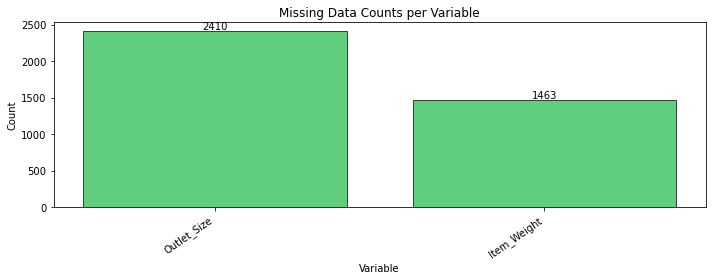

In [16]:
eda_helper_functions.plot_missing_info(temp)

## High Level Analysis of Outliers

In [17]:
forest = IsolationForest(n_estimators=10,random_state=42)

In [18]:
(
    train
    .assign(outlier=forest.fit_predict(train
                                       .drop(columns='price')
                                       .select_dtypes(include='number')
                                      ))
    .query('outlier==-1')
    #.duration
    #.describe()
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Jet Airways,2019-06-21,Mumbai,Hyderabad,2024-06-14 10:20:00,2024-06-14 11:50:00,90,0.0,No Info,8040,-1
16,Indigo,2019-05-15,Chennai,Kolkata,2024-06-14 05:15:00,2024-06-14 07:40:00,145,0.0,No Info,3540,-1
17,Jet Airways,2019-03-18,Banglore,New Delhi,2024-06-14 11:40:00,2024-06-14 10:25:00,1365,1.0,In-flight meal not included,11087,-1
19,Air India,2019-05-09,Delhi,Cochin,2024-06-14 20:15:00,2024-06-14 19:15:00,1380,2.0,No Info,13591,-1
22,Vistara,2019-05-15,Kolkata,Banglore,2024-06-14 07:10:00,2024-06-14 10:45:00,1655,1.0,No Info,8452,-1
...,...,...,...,...,...,...,...,...,...,...,...
631,Multiple Carriers,2019-03-06,Delhi,Cochin,2024-06-14 13:05:00,2024-06-14 21:20:00,495,2.0,No Info,10759,-1
633,Jet Airways,2019-05-27,Delhi,Cochin,2024-06-14 22:50:00,2024-06-14 19:00:00,1210,1.0,In-flight meal not included,12898,-1
636,Air India,2019-06-09,Kolkata,Banglore,2024-06-14 12:00:00,2024-06-14 13:15:00,1515,1.0,No Info,7662,-1
638,Air India,2019-06-12,Kolkata,Banglore,2024-06-14 10:00:00,2024-06-14 13:45:00,1665,2.0,No Info,12224,-1


## Pair Plot

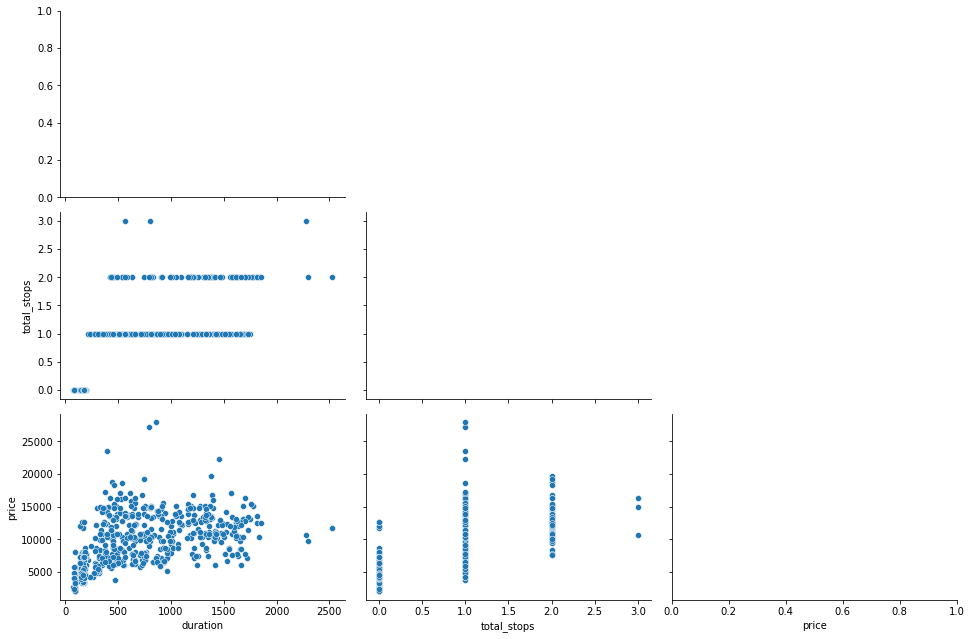

In [19]:
eda_helper_functions.pair_plots(train)

## Correalation Analysis

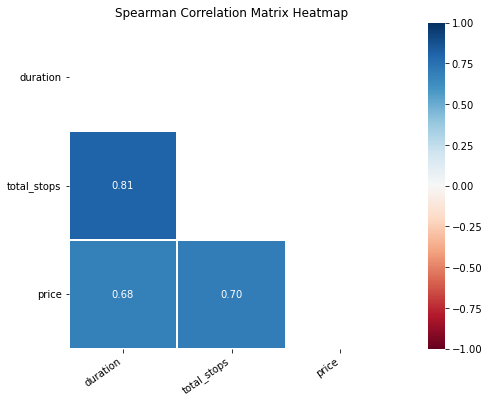

In [21]:
eda_helper_functions.correlation_heatmap(train)

## Detailed Analysis

In [23]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')